<a href="https://colab.research.google.com/github/llcorrea/TensorFlow_module/blob/main/TensorFlow_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ML model with TensorFlow 2**

# **Import libs**

In [66]:
import pandas as pd
from matplotlib import pyplot as plt

In [67]:
#@title Using TensorFlow 2.x
%tensorflow_version 2.x
import tensorflow as tf

TensorFlow (TF) is an end-to-end open source platform for machine learning.

Its APIs are organized hierarchically, with the high-level APIs built on the low-level APIs. 

Low-level APIs are used to explore new machine learning algorithms.

On the contrary, the high-level API named **tf.keras** is used to train and define machine learning models.

TF documentation: https://www.tensorflow.org/

# **Functions**

**Build the ML model**

Simple Linear Regression using tf.keras.

In [68]:
def build_model(learning_rate):
  ##the most simple keras models are sequential, which has one or more layers
  lr_model = tf.keras.models.Sequential()

  ##the topography of a simple linear regression is a single node (unit) in a single layer 
  lr_model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  ##compile the model topography to minimize the model's mean squared error while training 
  lr_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return lr_model

**Train the ML model with the input data (features and labels)**

In [69]:
def train_model(model, train_df, features, label, epochs, batch_size):
  history = model.fit(x=train_df[features],
                      y=train_df[label],
                      batch_size=batch_size,
                      epochs=epochs, verbose=0)

  ##trained model's parameters
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]
  epochs = history.epoch
  
  ##history of each epoch
  hist = pd.DataFrame(history.history)

  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

**Plotting functions**

In [70]:
def plot_model(trained_weight, trained_bias, train_df, feature, label):
  """Plot the trained model against the training feature and label"""
  
  ##create a scatter plot from some random points
  random_data = train_df.sample(n=200)
  plt.scatter(random_data[feature], random_data[label])

  plt.xlabel(feature)
  plt.ylabel(label)

  x0 = 0
  y0 = trained_bias
  #x1 = feature[-1]
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  plt.show()

In [71]:
def plot_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch"""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

#**Dataset and Training**

The dataset describes the 1990 census data from California.

**Load the dataset from Google repository**

https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv

> The dataset contains 17000 data entries with 9 features. 8 independent variables $X$ and one label (dependent variable $y$).

> The goal is to predict the target feature ($y$) **median_house_value** for new data based on the train dataset.\
To do so, we are going to train a linear regression model. The model predicts house value based on the other selected features from the dataset.  

* It has not any missing data. 

* All features are numerical (float64).

The following parameters of the linear regression model must be adjusted to let the model converge (min loss) and better fit the data:
* learning rate
* number of epochs
* batch size

Training loss should steadily decrease, steeply at first, and then more slowly. The loss should stay steady at the final epochs (nearly zero slope), which indicates that model has converged.

PS: One epoch covers sufficient iterations to process every entry in the dataset. Then, epoch is different of iteration. At the end of each iteration, the model's parameters are adjusted based on the reached loss value.

In [72]:
df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
print(df.shape)
df.head()
display(df.describe())
df.info()

df["median_house_value"] /= 1000.0 #rescale the label (y)



(17000, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


Feature: total_rooms


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Trained weight of 0.0275
Trained bias of 132.3674
RMSE of 124.0667


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


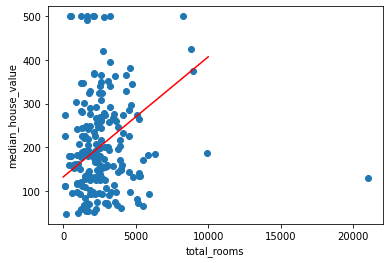

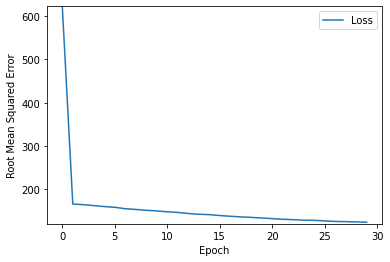

Feature: total_bedrooms
Trained weight of 0.0364
Trained bias of 194.6530
RMSE of 116.2882


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


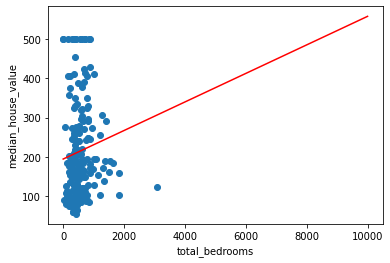

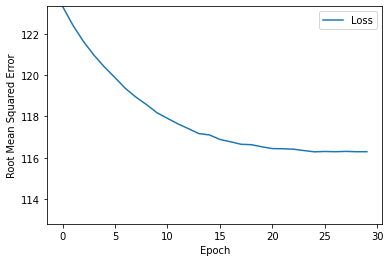

In [73]:
features=['total_rooms', 'total_bedrooms']  
y='median_house_value'

learning_rate = 0.01
lr_model=build_model(learning_rate)

for var_x in features:
  print("Feature:", var_x)
  batch_size = 30
  epochs = 30
  trained_weight, trained_bias, epochs, rmse=train_model(lr_model, df, [var_x], y, epochs, batch_size)

  print("Trained weight of %.4f" % trained_weight)
  print("Trained bias of %.4f" % trained_bias)
  print("RMSE of %.4f" % rmse.min())      
                  
  plot_model(trained_weight, trained_bias, df, var_x, y)
  plot_loss_curve(epochs, rmse)

**Hyperparameter tuning**

In general, ML problems require a lot of hyperparameter tuning. However, there aren't concrete rules for every model. Then, it's necessary to test distinct values in order to find the best set of hyperparameters for model and dataset [[Google AI](https://ai.google/education/)].

The ideal combination of hyperparameters is data dependent, so it's important to always experiment and verify like a cyclical process.